# Resources:


*   https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
*   https://jitm.ut.ac.ir/article_80028.html

*   https://towardsdatascience.com/complete-guide-to-perform-classification-of-tweets-with-spacy-e550ee92ca79?gi=7494f25db237 (not used)
*   https://github.com/kroudir/Twitter-Sentiment-Analysis-with-python/blob/master/Project_notebook.ipynb





# ⏬ Importing & Installing Modules

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import NMF
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Import other regression models you want to consider
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, precision_score

# 📖 Read Dataset & CSV files

In [ ]:
path = ''

The faced challenge:

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 60340: invalid continuation byte

In [ ]:
df_train = pd.read_csv(path + 'twitter_training.csv', encoding='ISO-8859-1')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_train.head(20)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [ ]:
df_test = pd.read_csv(path + 'twitter_test.csv', encoding='ISO-8859-1')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       500 non-null    int64 
 1   entity         500 non-null    object
 2   sentiment      500 non-null    object
 3   Tweet content  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [ ]:
df_test.head()

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df_valid = pd.read_csv(path + 'twitter_validation.csv', encoding='ISO-8859-1')

df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       500 non-null    int64 
 1   entity         500 non-null    object
 2   sentiment      500 non-null    object
 3   Tweet content  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [ ]:
df_valid.head()

,Tweet ID,entity,sentiment,Tweet content
0,5328,Hearthstone,Negative,@BlizzardCS whatâs going on with Hearthstone...
1,7618,MaddenNFL,Negative,@EAMaddenNFL is there a reason OFFLINE franchi...
2,7108,johnson&johnson,Negative,Johnson & Johnson is about to enter phase 3 tr...
3,10008,PlayerUnknownsBattlegrounds(PUBG),Negative,How is banning #PUBG going to fix anything? Al...
4,49,Amazon,Neutral,I played this interesting quiz on Amazon - Try...


In [ ]:
df_train.shape

(73996, 4)

In [ ]:
np.sum(df_train.isnull().any(axis=1)) # For tweet_content column -> 74682 - 73996

0

In [ ]:
df_train.dropna(subset=['Tweet content'], inplace=True)

In [ ]:
df_train['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

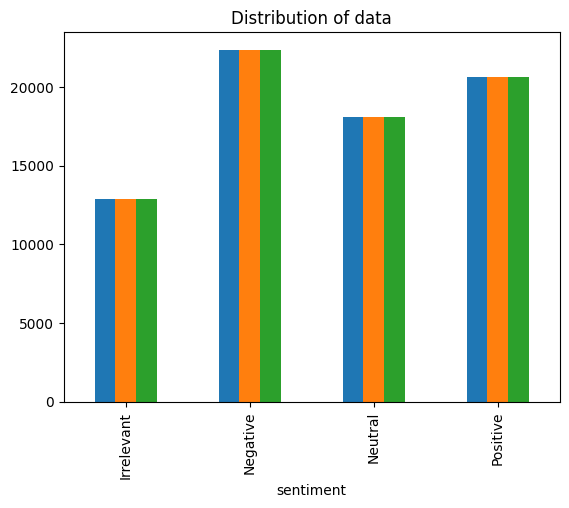

In [ ]:
# Plotting the distribution for dataset.
ax = df_train.groupby('sentiment').count().plot(kind='bar', title='Distribution of data in training dataset',legend=False)
# Storing data in lists.
text, sentiment = list(df_train['Tweet content']), list(df_train['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

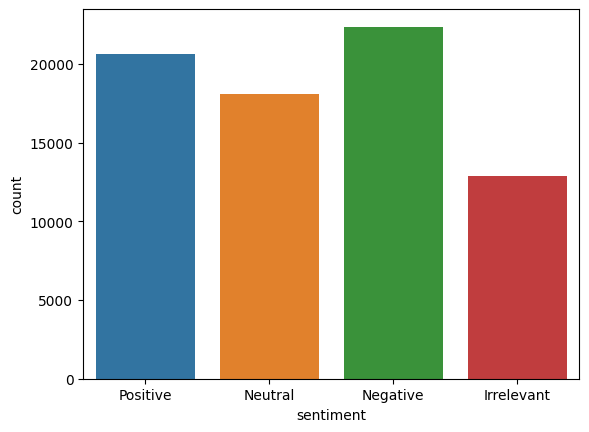

In [ ]:
sns.countplot(x='sentiment', data=df_train)

# ➕ Appending validation and test set to train

In [ ]:
combi = df_train.append(df_test, ignore_index=True)
combi.shape

<ipython-input-23-8b9c04c5ce30>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = df_train.append(df_test, ignore_index=True)


(74496, 4)

In [ ]:
combi = combi.append(df_valid, ignore_index=True)
combi.shape

<ipython-input-26-f5d48252a6dc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = combi.append(df_valid, ignore_index=True)


(74996, 4)

In [ ]:
combi.head(-10)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74981,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\nâO...
74982,3980,Cyberpunk2077,Positive,This looks like a poster for a 90s action movi...
74983,4905,GrandTheftAuto(GTA),Irrelevant,The ultimate pruning machine! @stihlusa GTA 26...
74984,7516,LeagueOfLegends,Neutral,â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...


In [ ]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74996 entries, 0 to 74995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74996 non-null  int64 
 1   entity         74996 non-null  object
 2   sentiment      74996 non-null  object
 3   Tweet content  74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# 🧹 Pre-processing

```
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':-)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [': )']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
```



In [ ]:
def remove_pattern(input_txt, pattern, new_text, opt="replace"):
    r = re.findall(pattern, input_txt)
    if len(r) > 0:
      print(f"The finded item to be replaced for the given pattern {pattern} is: {r}")
    if opt == "replace":
      for i in r:
        input_txt = re.sub(re.escape(i), new_text, input_txt)
    if opt == "remove":
      for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

To solve the challenge:

https://stackoverflow.com/questions/15947140/python-regex-error-unbalanced-parenthesis

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Tweet content'],
                                                   "(:\s?\)|:-\)|\(\s?:|\(-:|:\’\))",
                                                   new_text="smile",
                                                   opt="replace")
combi['tidy_tweet'].head(10)



```
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: ['xD']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: ['XD']
```



In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?D|:-D|x-?D|X-?D)",
                                                   new_text="laugh",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

Nothing was found...

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(<3|:\*)",
                                                   new_text="love",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object



```
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [':(']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [') :']
```



In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?\(|:-\(|\)\s?:|\)-:)",
                                                   new_text="sad",
                                                   opt="replace")
combi['tidy_tweet'].head(10)



```
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
```



In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   """(:,\(|:\’\(|:"\()""",
                                                   new_text="cry",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']


0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

Nothing was found...

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?\(|:-\(|\)\s?:|\)-:)",
                                                   new_text="wink",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "@[\w]*", '', opt="remove")
combi['tidy_tweet'].head(10)

Streaming output truncated to the last 5000 lines.
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for th

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In the article it is said that the hashtags are better to be removed, but in the github link the opposite is said...

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "#(\S+)", '', opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern #(\S+) is: ['Browns']
The finded item to be replaced for the given pattern #(\S+) is: ['stream', 'twitch', 'RocketLeague', 'SeaOfThieves', 'RainbowSixSiege', 'follow']
The finded item to be replaced for the given pattern #(\S+) is: ['TCCGif', 'AssassinsCreedBlackFlag', 'AssassinsCreed', 'TheCapturedCollective']
The finded item to be replaced for the given pattern #(\S+) is: ['Warzone', 'COD', 'CallofDuty', 'Warzone']
The finded item to be replaced for the given pattern #(\S+) is: ['gtc20']
The finded item to be replaced for the given pattern #(\S+) is: ['COVID19']
The finded item to be replaced for the given pattern #(\S+) is: ['update', 'overwatchleague', 'nyxl', 'overwatch', 'overwatch2', 'blizzard', 'games', 'lockdown']
The finded item to be replaced for the given pattern #(\S+) is: ['pubg', 'pubgmobile', 'pubgkenya']
The finded item to be replaced for the given pattern #(\S+) is: ['COVID19', 'vaccine...', 'Glaxosmithkline']
The f

0                      getting borderlands will murder
1                        coming borders will kill all,
2                   getting borderlands will kill all,
3                  coming borderlands will murder all,
4                 getting borderlands will murder all,
5                 getting into borderlands murder all,
6    spent hours making something fun. don't know H...
7    spent couple hours doing something fun... don'...
8    spent hours doing something fun... don't know ...
9    spent hours making something fun. don't know H...
Name: tidy_tweet, dtype: object

Nothing was found...

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "((www\. [\S] +) | (https? ://[\S] +))", '', opt="replace")
combi['tidy_tweet'].head(10)

0                      getting borderlands will murder
1                        coming borders will kill all,
2                   getting borderlands will kill all,
3                  coming borderlands will murder all,
4                 getting borderlands will murder all,
5                 getting into borderlands murder all,
6    spent hours making something fun. don't know H...
7    spent couple hours doing something fun... don'...
8    spent hours doing something fun... don't know ...
9    spent hours making something fun. don't know H...
Name: tidy_tweet, dtype: object

# Text Normalization

# Feature Extraction

# Model Training

# Evaluations